## Libraries and Imports

In [1]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

# For reproducibility
np.random.seed(42)

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

%matplotlib inline

## Convolutional Neural Network

In [2]:
# Instantiates model
model = Sequential()

# First convolutional layer
model.add(Conv2D(filters=32,
                 kernel_size=(5, 5),
                 strides=(1, 1),
                 padding='same',
                 activation='relu',       
                 input_shape=(256, 256, 3))) 

# Pooling layer with striding
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2))) 

# Second convolutional layer
model.add(Conv2D(64,
                 kernel_size=(5, 5),
                 activation='relu'))

# Second pooling layer, no striding
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Regularization layers
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compiles model
model.compile(loss='binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

## Parameters

In [5]:
training_dir = 'D:/Google Drive/capstone_images/'
validate_dir = 'D:/Google Drive/capstone_images/keepers'
image_height = 256
image_width  = 256
batch_size   = 32
num_epochs   = 20

## Model Construction and Fitting

In [6]:
train_image_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',    # constant, nearest, reflect, wrap
    validation_split=0.25)

training_generator = train_image_datagen.flow_from_directory(
    training_dir,
    target_size=(image_height, image_width), # Images resized to this.
    color_mode='rgb',
    batch_size = batch_size,
    class_mode='binary',
    subset='training')
    
validation_generator = train_image_datagen.flow_from_directory(
    training_dir,
    target_size=(image_height, image_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')
    
history = model.fit_generator(
    training_generator,
    steps_per_epoch = training_generator.samples // batch_size,
    validation_data = validation_generator,
    validation_steps = validation_generator.samples // batch_size,
    epochs=num_epochs)

Found 10732 images belonging to 2 classes.
Found 3577 images belonging to 2 classes.
  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 335 steps, validate for 111 steps
Epoch 1/20
335/335 [==============================] - 273s 816ms/step - loss: 0.3304 - accuracy: 0.9211 - val_loss: 0.2595 - val_accuracy: 0.9257
Epoch 2/20
335/335 [==============================] - 226s 676ms/step - loss: 0.3000 - accuracy: 0.9242 - val_loss: 0.2694 - val_accuracy: 0.9257
Epoch 3/20
335/335 [==============================] - 256s 765ms/step - loss: 0.2856 - accuracy: 0.9254 - val_loss: 0.2779 - val_accuracy: 0.9257
Epoch 4/20
335/335 [==============================] - 261s 779ms/step - loss: 0.2788 - accuracy: 0.9254 - val_loss: 0.2636 - val_accuracy: 0.9257
Epoch 5/20
335/335 [==============================] - 256s 765ms/step - loss: 0.2764 - accuracy: 0.9253 - val_loss: 0.2676 - val_accuracy: 0.9257
Epoch 6/20
335/335 [==============================] - 252s 751ms/step - loss: 0.2712 - accu

## Summary & Analysis

In [20]:
training_generator.class_indices

{'duds': 0, 'keepers': 1}

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 124, 124, 64)      51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 246016)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                15745088  
_________________________________________________________________
dropout (Dropout)            (None, 64)                0

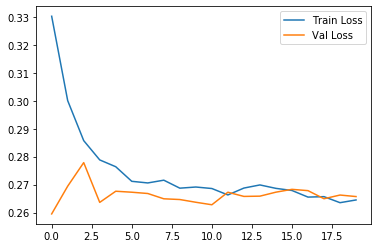

In [9]:
# Generates line plot for loss.
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend();

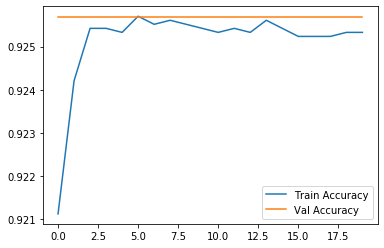

In [10]:
# Generates line plot for accuracy.
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend();